# Exploratory Analysis

### Exploratory Analysis for Overall Lightning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = r"..\Downloads\Combined_WWLLN_Locations_w_header.txt"

data = pd.read_csv(file_path)

print(data.head())

   year  month  day  hour  min      sec      lat      lon  \
0  2011      7   28     1    7  57.4687   3.2448 -44.0808   
1  2011      7   28     2   17  38.7138  10.0862 -24.7260   
2  2011      7   28     2   17  38.7632  10.0756 -24.6255   
3  2011      7   28     2   17  38.7897  10.1114 -24.8444   
4  2011      7   28     2   24  39.0709  10.1117 -25.0140   

   distance_from_storm_center_km_east  distance_from_storm_center_km_north  \
0                            -1102.31                             -500.725   
1                             1059.46                              255.324   
2                             1070.50                              254.146   
3                             1046.42                              258.127   
4                             1027.85                              258.160   

  storm_code storm_name  hypotenuse_disance_from_storm_center  inner_core_ind  
0   ATL_11_5      Emily                           1210.707587               0  
1   

#### Lightning count during a cyclone

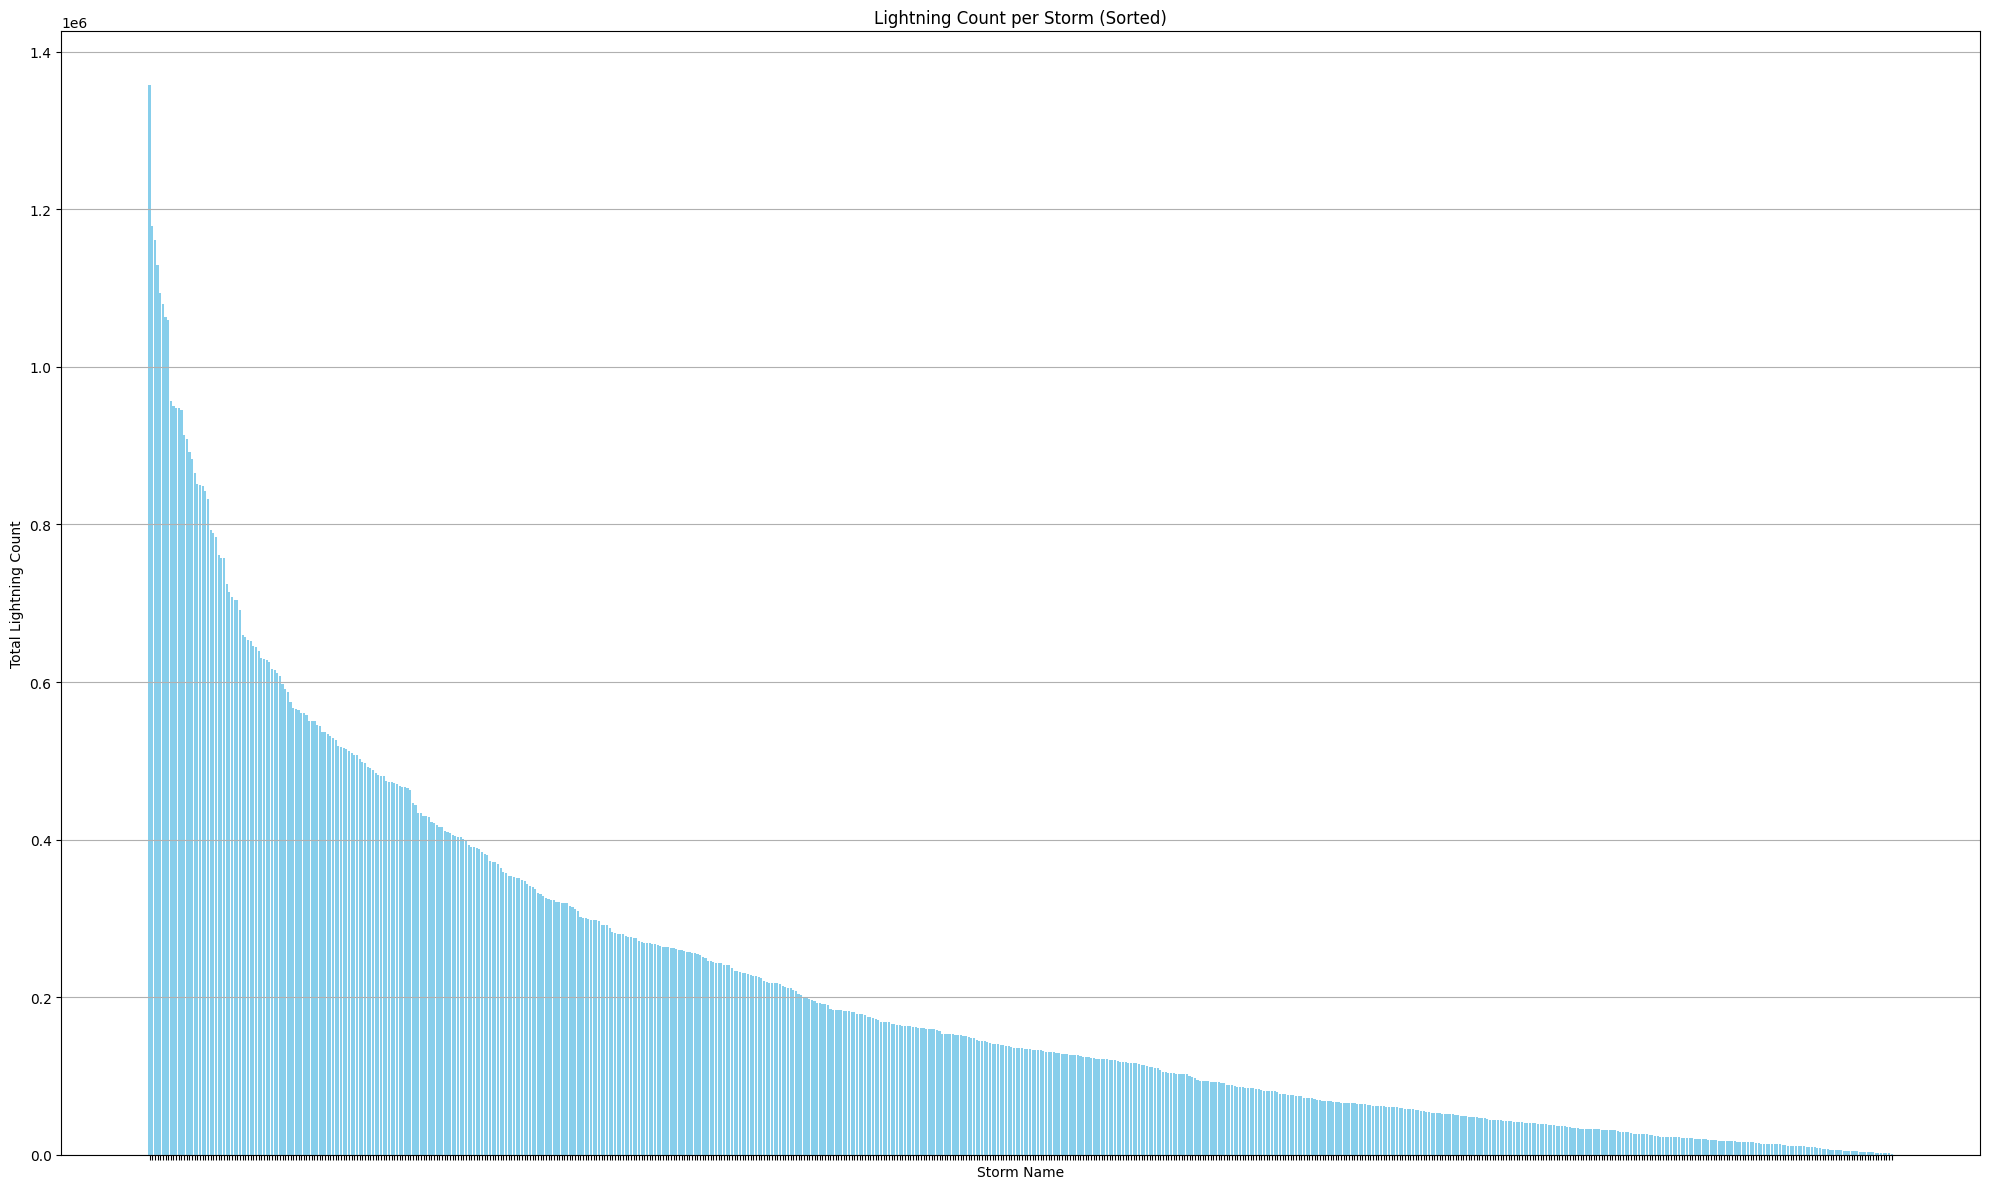

In [17]:
lightning_count = data.groupby('storm_name').size().reset_index(name='lightning_count')

lightning_count_sorted = lightning_count.sort_values(by='lightning_count', ascending=False)

plt.figure(figsize=(20,12))
plt.bar(lightning_count_sorted['storm_name'], lightning_count_sorted['lightning_count'], color='skyblue')
plt.xticks(visible=False)
plt.title('Lightning Count per Storm (Sorted)')
plt.xlabel('Storm Name')
plt.ylabel('Total Lightning Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


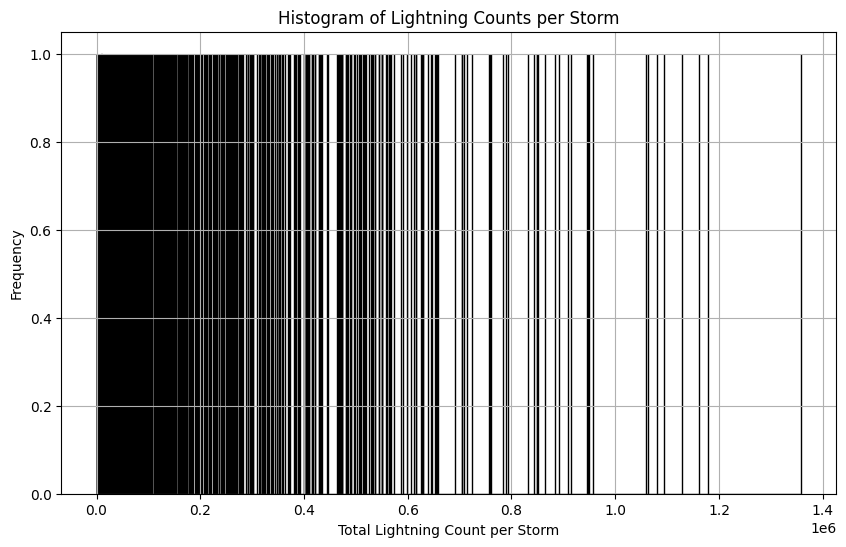

In [18]:
plt.figure(figsize=(10,6))
plt.hist(lightning_count['lightning_count'], bins=range(1, lightning_count['lightning_count'].max() + 2), edgecolor='black', color='skyblue')
plt.title('Histogram of Lightning Counts per Storm')
plt.xlabel('Total Lightning Count per Storm')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Cyclone per year

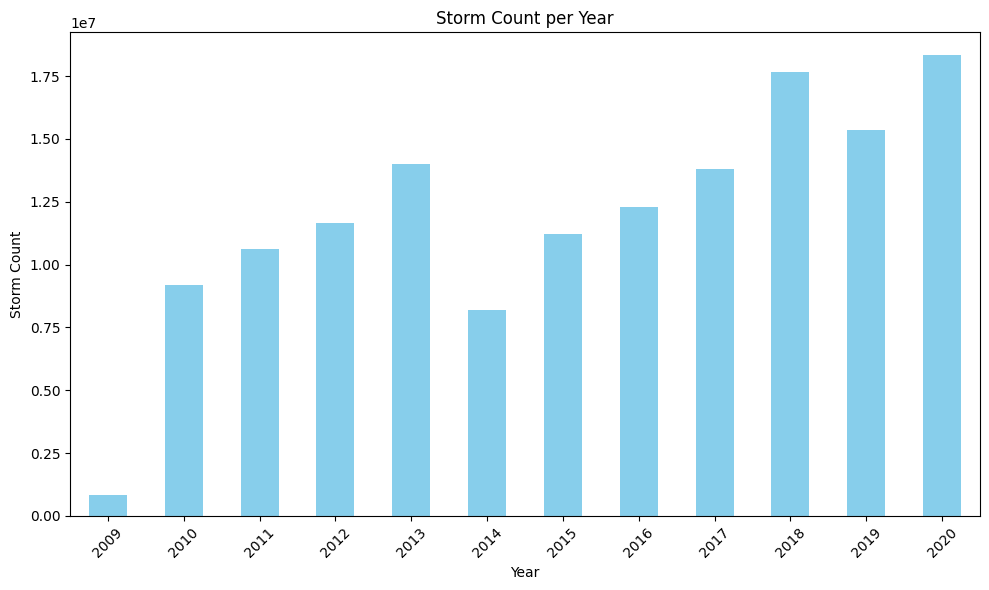

In [19]:
storm_counts = data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
storm_counts.plot(kind='bar', color='skyblue')
plt.title('Storm Count per Year')
plt.xlabel('Year')
plt.ylabel('Storm Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Average lightning occurrences by hour

<function matplotlib.pyplot.show(close=None, block=None)>

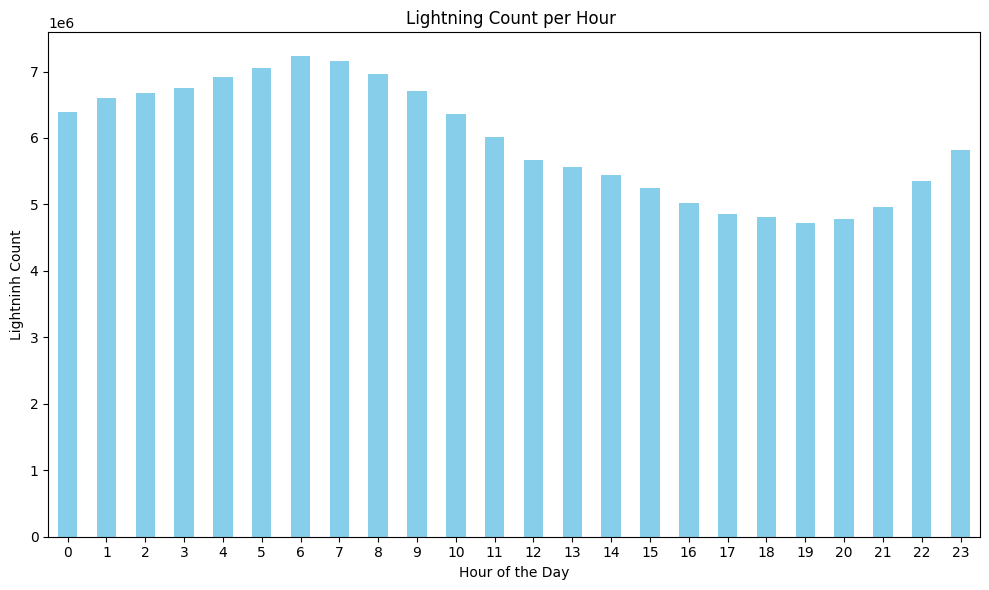

In [21]:
lightning_count_per_hour = data['hour'].value_counts().sort_index()

# Plot the storm count per hour
plt.figure(figsize=(10, 6))
lightning_count_per_hour.plot(kind='bar', color='skyblue')
plt.title(f'Lightning Count per Hour ')
plt.xlabel('Hour of the Day')
plt.ylabel('Lightninh Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

Storm with most lightning: ATL_20_28


<function matplotlib.pyplot.show(close=None, block=None)>

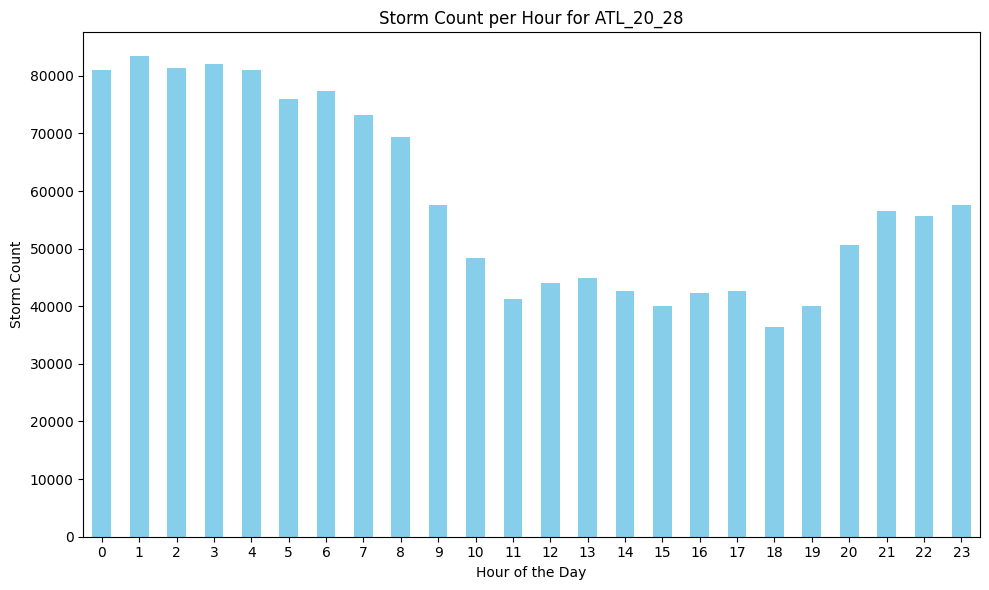

In [20]:
storm_counts = data['storm_code'].value_counts()
storm_with_most_lightning = storm_counts.idxmax()
print(f"Storm with most lightning: {storm_with_most_lightning}")

# Filter the data for the storm with the most lightning
filtered_df = data[data['storm_code'] == storm_with_most_lightning]

# Count storm occurrences per hour
storm_count_per_hour = filtered_df['hour'].value_counts().sort_index()

# Plot the storm count per hour
plt.figure(figsize=(10, 6))
storm_count_per_hour.plot(kind='bar', color='skyblue')
plt.title(f'Storm Count per Hour for {storm_with_most_lightning}')
plt.xlabel('Hour of the Day')
plt.ylabel('Storm Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

#### Cyclone Duration

In [4]:
# Step 1: Create a 'datetime' column by combining year, month, day, hour into a datetime string
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Step 2: Sort by storm_code and datetime
df = data.sort_values(by=['storm_code', 'datetime'])

# Step 3: Calculate the storm duration for each storm
# Group by storm_code and calculate the difference between the first and last datetime
storm_duration = df.groupby('storm_code').agg(
    storm_start=('datetime', 'min'),
    storm_end=('datetime', 'max')
)

# Calculate the duration in timedelta
storm_duration['duration'] = storm_duration['storm_end'] - storm_duration['storm_start']

# Step 4: Display the results
print(storm_duration[['storm_start', 'storm_end', 'duration']])

                   storm_start           storm_end         duration
storm_code                                                         
ATL_10_1   2010-06-20 17:00:00 2010-07-01 18:00:00 11 days 01:00:00
ATL_10_10  2010-09-04 05:00:00 2010-09-06 00:00:00  1 days 19:00:00
ATL_10_11  2010-09-07 00:00:00 2010-09-21 17:00:00 14 days 17:00:00
ATL_10_12  2010-09-12 05:00:00 2010-09-24 10:00:00 12 days 05:00:00
ATL_10_13  2010-09-09 11:00:00 2010-09-18 00:00:00  8 days 13:00:00
...                        ...                 ...              ...
WPAC_20_5  2020-08-06 11:00:00 2020-08-11 06:00:00  4 days 19:00:00
WPAC_20_6  2020-08-09 00:00:00 2020-08-13 00:00:00  4 days 00:00:00
WPAC_20_7  2020-08-08 11:00:00 2020-08-12 00:00:00  3 days 13:00:00
WPAC_20_8  2020-08-16 00:00:00 2020-08-19 12:00:00  3 days 12:00:00
WPAC_20_9  2020-08-20 00:00:00 2020-08-27 18:00:00  7 days 18:00:00

[984 rows x 3 columns]


In [7]:
min_duration = storm_duration['duration'].min()
max_duration = storm_duration['duration'].max()
avg_duration = storm_duration['duration'].mean()



print(f"Minimum storm duration: {min_duration:} ")
print(f"Maximum storm duration: {max_duration:} ")
print(f"Average storm duration: {avg_duration:} ")

Minimum storm duration: 0 days 13:00:00 
Maximum storm duration: 26 days 18:00:00 
Average storm duration: 8 days 02:18:02.926829268 


### Exploratory Analysis for Wind and Pressure


In [3]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [4]:
storm_data = pl.read_csv("Filtered_Reduced_Trackfile.csv")

In [5]:
# clean up null pressure data
storm_data = storm_data.with_columns(
    pl.when(pl.col("pressure") == 0)
    .then(None)  # Replace 0 with None -> 0 is not possible, treat these as null but don't remove row bc the wind speed value is valid
    .otherwise(pl.col("pressure"))
    .alias("pressure")  # Keep the column name as "pressure"
)
storm_data.head()

year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name,category,basin
i64,i64,i64,i64,f64,f64,i64,i64,str,str,i64,str
2020,10,20,0,12.1,-80.0,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,6,12.5,-80.1,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,12,12.8,-80.2,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,18,13.2,-80.3,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,21,0,13.8,-80.4,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""


In [6]:
# peak intensity -> min pressure, max wind speed
peak_intensity = storm_data.group_by('storm_code', 'basin').agg(
    [pl.col('pressure').min().alias('min_pressure'),
     pl.col('knots').max().alias('max_wind_speed')]
)

peak_intensity.head()

storm_code,basin,min_pressure,max_wind_speed
str,str,i64,i64
"""WPAC_12_26""","""WPAC""",918,140
"""ATL_20_14""","""ATL""",991,65
"""IO_13_6""","""IO""",974,65
"""SHEM_17_15""","""SHEM""",930,130
"""SHEM_20_14""","""SHEM""",961,95


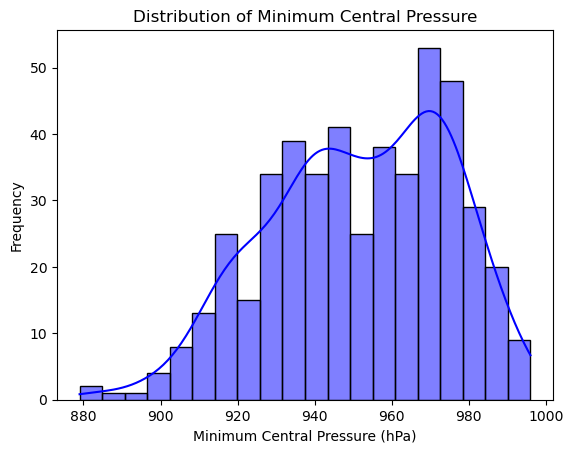

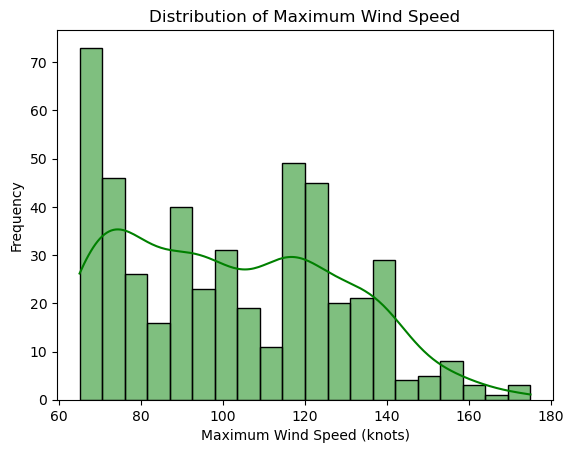

In [7]:
# Histogram of minimum pressure
sns.histplot(peak_intensity['min_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Minimum Central Pressure')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of maximum wind speed
sns.histplot(peak_intensity['max_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Maximum Wind Speed')
plt.xlabel('Maximum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

In [8]:
least_intensity = storm_data.group_by('storm_code').agg(
    [pl.col('pressure').max().alias('max_pressure'),
     pl.col('knots').min().alias('min_wind_speed')]
)

least_intensity.head()

storm_code,max_pressure,min_wind_speed
str,i64,i64
"""SHEM_14_18""",1010,15
"""WPAC_19_15""",1010,15
"""EPAC_18_20""",1009,20
"""SHEM_20_20""",1007,20
"""ATL_19_2""",1012,15


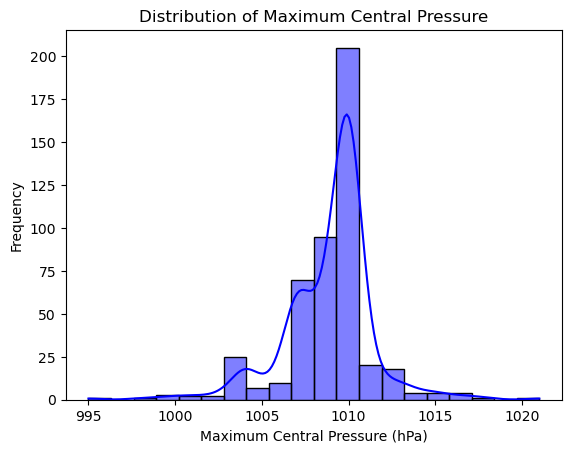

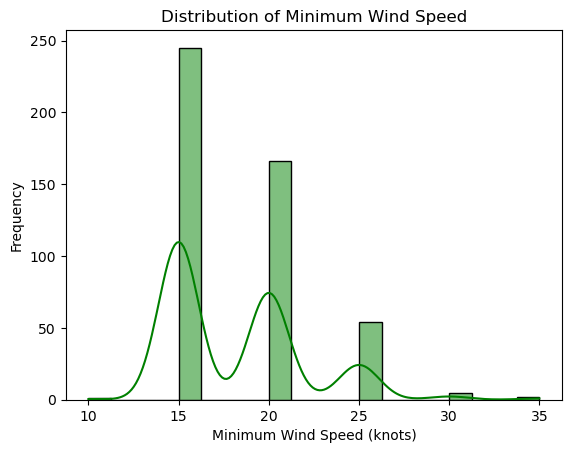

In [9]:
# Histogram of maximum pressure
sns.histplot(least_intensity['max_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Maximum Central Pressure')
plt.xlabel('Maximum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(least_intensity['min_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Minimum Wind Speed')
plt.xlabel('Minimum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# percent difference
pct_difference = peak_intensity.join(least_intensity, on="storm_code", how="inner")
pct_difference = pct_difference.with_columns(
    ((pl.col("max_pressure") - pl.col("min_pressure")) / pl.col("min_pressure") * 100)
    .alias("pressure_pct_change"),
    ((pl.col("max_wind_speed") - pl.col("min_wind_speed")) / pl.col("min_wind_speed") * 100)
    .alias("wind_pct_change")
)

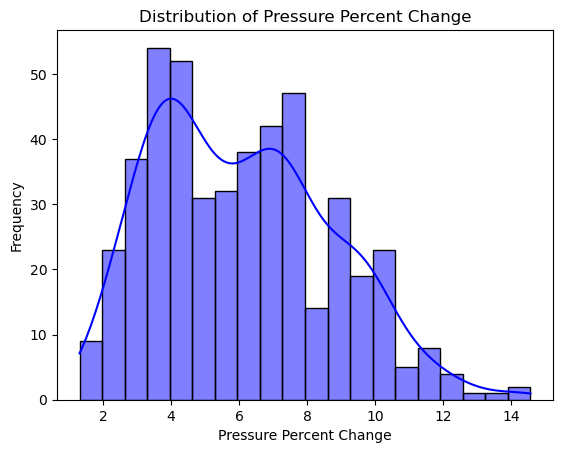

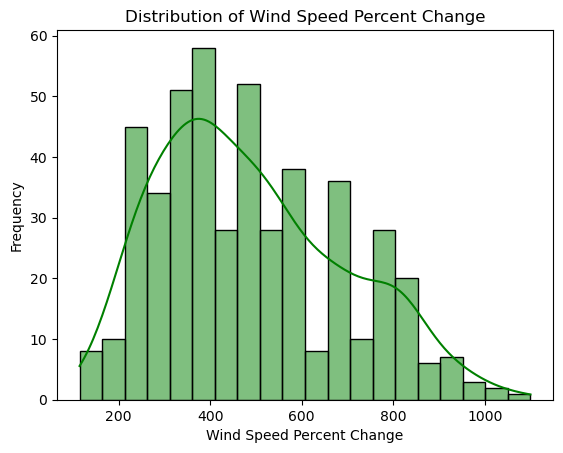

In [11]:
# Histogram of pressure percent change
sns.histplot(pct_difference['pressure_pct_change'], kde=True, bins=20, color='blue')
plt.title('Distribution of Pressure Percent Change')
plt.xlabel('Pressure Percent Change')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(pct_difference['wind_pct_change'], kde=True, bins=20, color='green')
plt.title('Distribution of Wind Speed Percent Change')
plt.xlabel('Wind Speed Percent Change')
plt.ylabel('Frequency')
plt.show()

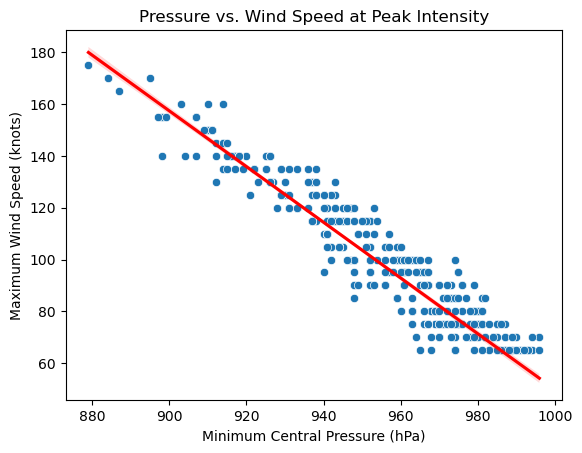

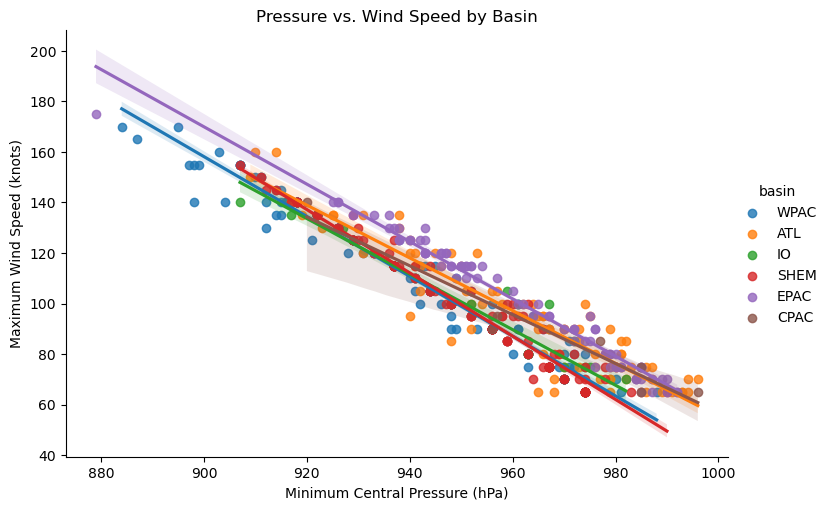

In [12]:
# Pressure-Wind Relationship
sns.scatterplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed')
sns.regplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed', scatter=False, color='red')
plt.title('Pressure vs. Wind Speed at Peak Intensity')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# grouping by 'basin'
sns.lmplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed', hue='basin', aspect=1.5)
plt.title('Pressure vs. Wind Speed by Basin')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

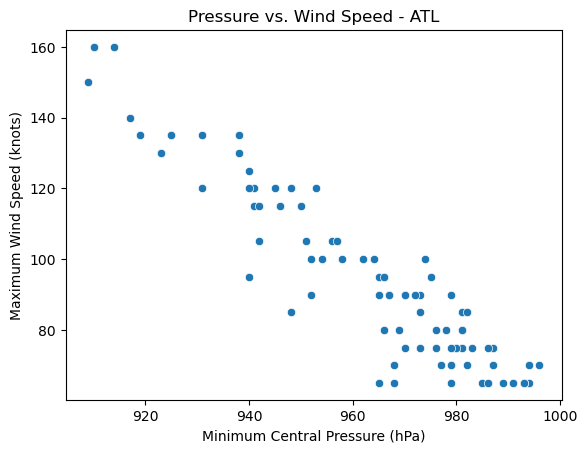

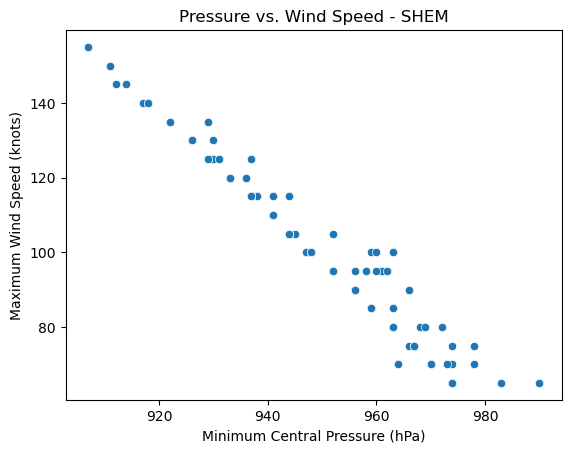

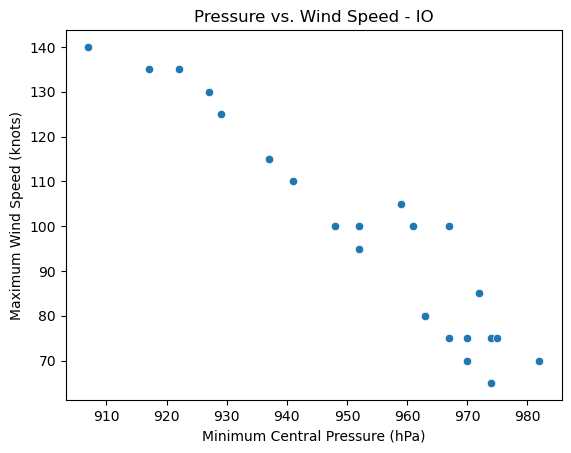

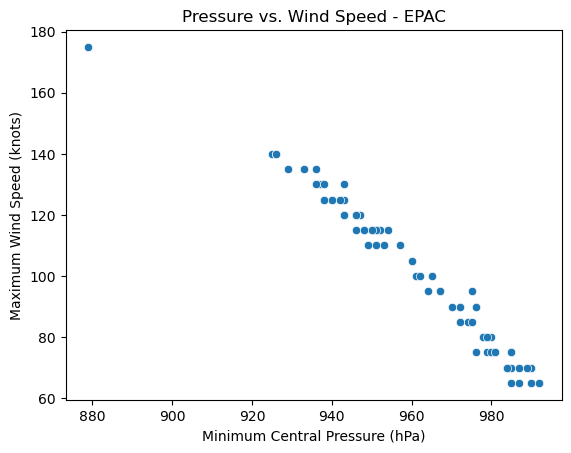

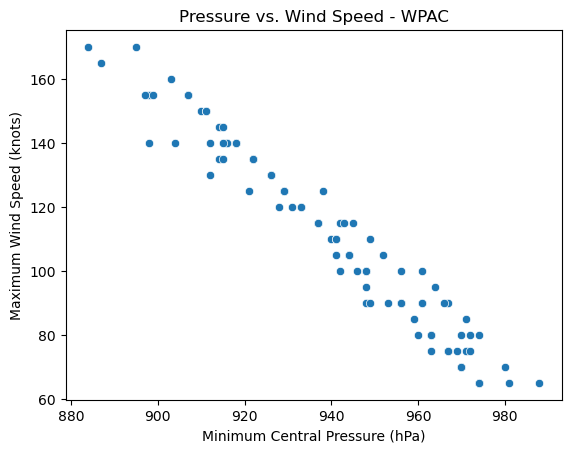

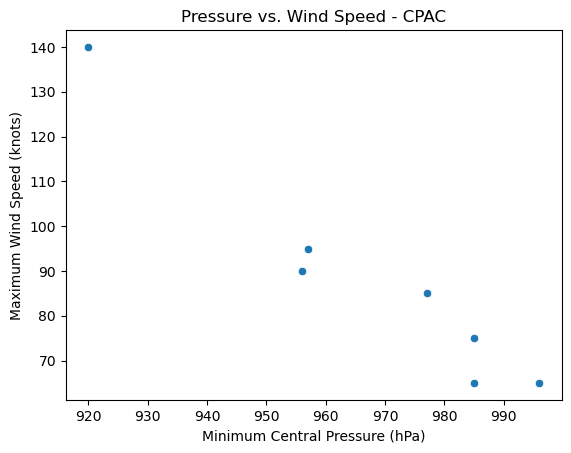

In [13]:
# one for each basin separately
# ATL
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "ATL").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - ATL')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# SHEM
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "SHEM").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - SHEM')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# IO
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "IO").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - IO')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# EPAC
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "EPAC").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - EPAC')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# WPAC
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "WPAC").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - WPAC')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# CPAC
sns.scatterplot(data=peak_intensity.filter(pl.col("basin") == "CPAC").to_pandas(), x='min_pressure', y='max_wind_speed')
plt.title('Pressure vs. Wind Speed - CPAC')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()